
# Input plots

Weill, S., et al. « Coupling Water Flow and Solute Transport into a Physically-Based Surface–Subsurface Hydrological Model ». 
Advances in Water Resources, vol. 34, no 1, janvier 2011, p. 128‑36. DOI.org (Crossref), 
https://doi.org/10.1016/j.advwatres.2010.10.001.

This example shows how to use pyCATHY object to plot inputs of the hydrological model.

*Estimated time to run the notebook = 5min*


In [1]:
# map_prop_veg ?
# map_prop2zone

In [2]:
import numpy as np

from pyCATHY import cathy_tools
from pyCATHY.plotters import cathy_plots as cplt

In [3]:
path2prj = "../SSHydro/" 
simu = cathy_tools.CATHY(dirName=path2prj, 
                         prj_name="weil_exemple_inputs_plot"
                         )

# simu.run_preprocessor()

🏁 Initiate CATHY object

😟 src files not found

working directory 
is:/home/z0272571a@CAMPUS.CSIC.ES/Nextcloud/BenCSIC/Codes/BenjMy/pycathy_wrapper/doc/content/SSHydro/../SSHydro/

📥 Fetch cathy src files

📥 Fetch cathy prepro src files

📥 Fetch cathy inputfiles

simu.show_input(prop="dem")



In [4]:
# show time atmbc
# simu.show_input(prop='atmbc')

# In progress --> show spatial atmbc

# simu.update_dem_parameters()
# simu.update_prepo_inputs()

Add a new zone



🔄 Update hap.in file

🔄 update dem_parameters file 

🔄 update dem_parameters file 

─────────────────────────────────────────── ⚠ warning messages above ⚠ ────────────────────────────────────────────

                            The parm dictionnary is empty
                            Falling back to defaults to update CATHYH
                            This can have consequences !!
                            

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

🔄 update parm file 

─────────────────────────────────────────── ⚠ warning messages above ⚠ ────────────────────────────────────────────

['Adjusting TMAX with respect to time of interests requested\n']

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

🔄 update zone file 

🔄 update dem_parameters file 

🔄 update parm file 

🔄 Update soil

Inconsistent number of zones/layers with respect to the number of soil lines: 20/15


homogeneous soil

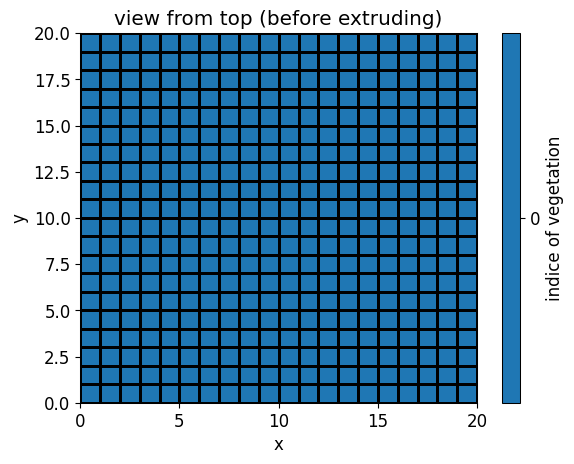

In [5]:
simu.update_prepo_inputs()
simu.update_veg_map(np.ones([int(simu.hapin['N']),int(simu.hapin['M'])]))
simu.update_zone(np.ones([int(simu.hapin['N']),int(simu.hapin['M'])]))
simu.show_input(prop="root_map")

simu.update_soil()

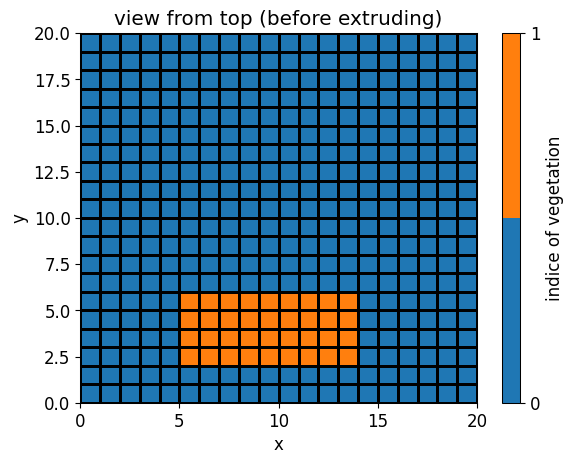

In [6]:
veg_map = simu.veg_map
veg_map[2:6, 5:14] = 2
simu.update_veg_map(veg_map)
simu.show_input(prop="root_map")

Feddes is a dictionnary with 6 entries, and for each a list



In [7]:
FP_map_1zone = simu.soil_FP["FP_map"]  # read existing mapping
FP_map_2zones = {}
for k in FP_map_1zone:
    if k == "ZROOT":
        ZROOT_zone2 = FP_map_1zone["ZROOT"][0] / 2
        FP_map_2zones[k] = [FP_map_1zone[k][0], ZROOT_zone2]
    else:
        FP_map_2zones[k] = [FP_map_1zone[k][0], FP_map_1zone[k][0]]

# simu.show_input(prop='soil', yprop='ZROOT', layer_nb=12)

🔄 Update soil

homogeneous soil

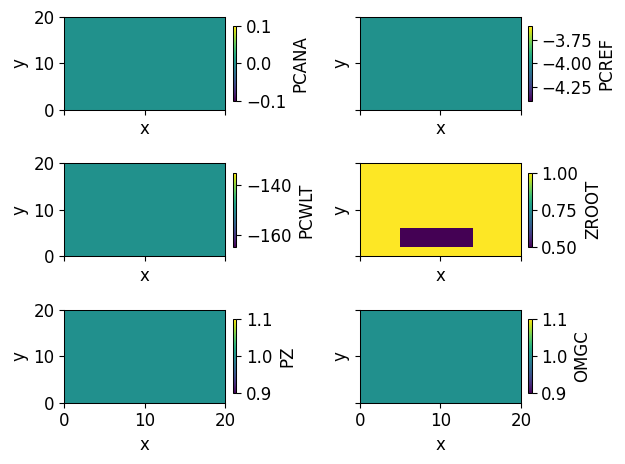

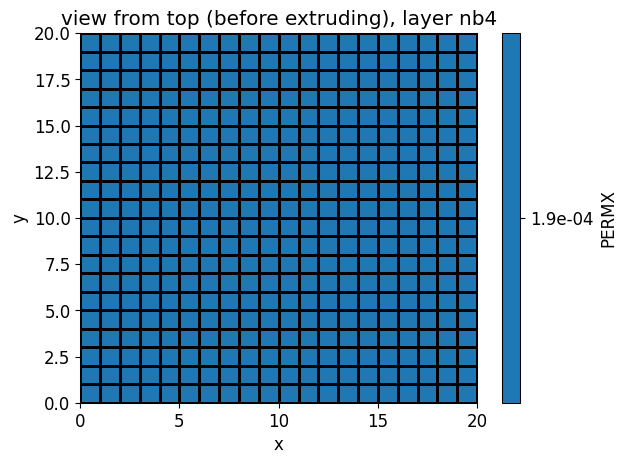

In [8]:
simu.update_soil(FP_map=FP_map_2zones, show=True)

# simu.update_zone(veg_map)
# simu.update_veg_map(veg_map)

simu.show_input(prop="soil", yprop="PERMX", layer_nb=4)

# Here we can imaging to get a more complexe vegetation map from remote sensing data instead

In [9]:
simu.update_prepo_inputs()

🔄 Update hap.in file

🔄 update dem_parameters file 

🔄 update dem_parameters file 

This will automatically create a new vtk mesh containing the zone flags
error --> number of tretra in grid3d < n of tretra in the mesh (mission one element)



In [10]:
simu.update_zone()

🔄 update zone file 

🔄 update dem_parameters file 

🔄 update parm file 

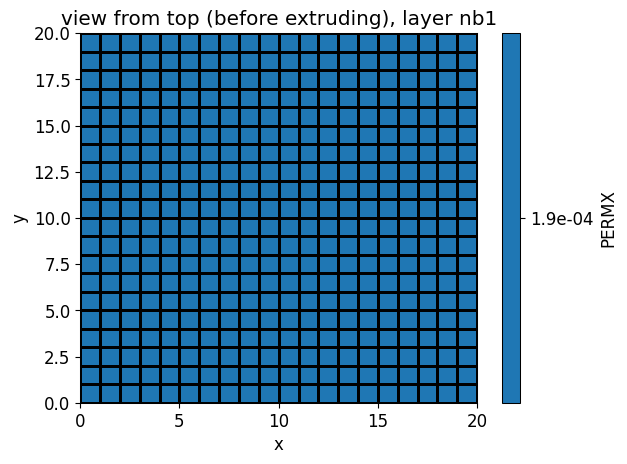

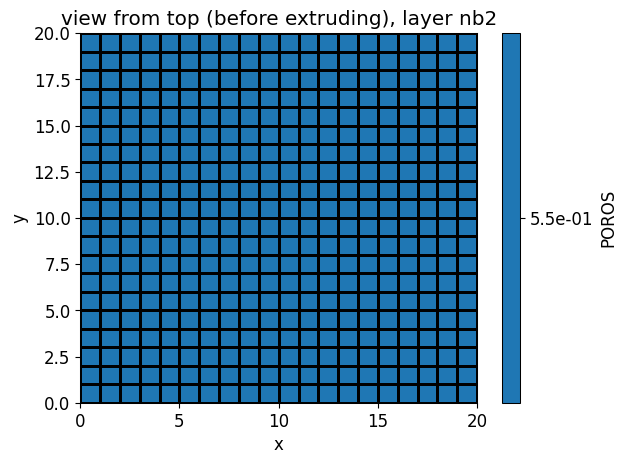

In [11]:
simu.show_input(prop="soil", yprop="PERMX", layer_nb=1)
simu.show_input(prop="soil", yprop="POROS", layer_nb=2)

Show layer number 10



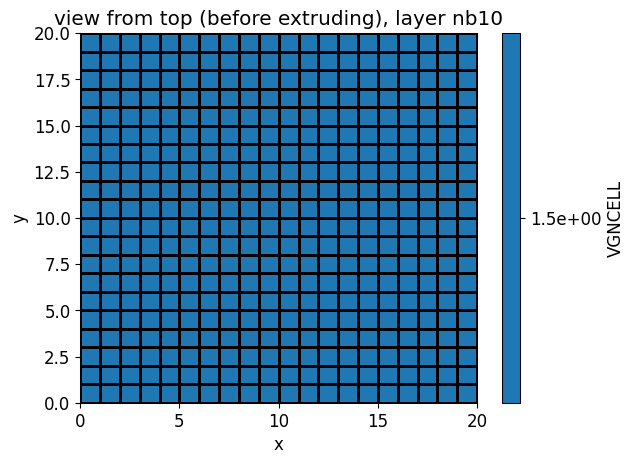

In [12]:
simu.show_input(prop="soil", yprop="VGNCELL", layer_nb=10)

In [13]:
simu.update_soil()
df_soil, _ = simu.read_inputs("soil")
df = simu.read_inputs("soil")

🔄 Update soil

homogeneous soil

🔄 Update hap.in file

🔄 update dem_parameters file 

🔄 update dem_parameters file 

🔄 update zone file 

🔄 update dem_parameters file 

🔄 update parm file 

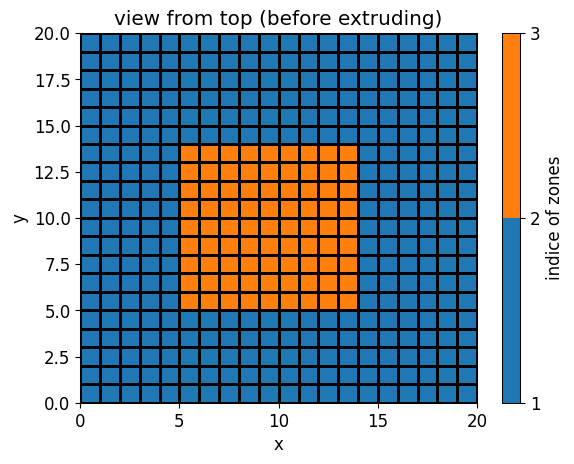

In [14]:
zones = simu.zone
simu.update_prepo_inputs()
zones[5:14, 5:14] = 2
simu.update_zone(zones)
simu.show_input(prop="zone")

we just need to build a dictionnary as: {property: [value_zone1, value_zone2]}
or a panda dataframe



In [15]:
SPP_map_1zone = simu.soil_SPP["SPP_map"]  # read existing mapping

PERMX_zones = [SPP_map_1zone["PERMX"][0], 
         SPP_map_1zone["PERMX"][0]/2]

SPP_map_zone2 = simu.init_soil_df(2, len(SPP_map_1zone))

for c in SPP_map_1zone:
    SPP_map_zone2.loc[[0],c]=SPP_map_1zone[c].values
    SPP_map_zone2.loc[[1],c]=SPP_map_1zone[c].values

for i, pi in enumerate(PERMX_zones):
    SPP_map_zone2.loc[[i],'PERMX']=PERMX_zones[i].values

simu.update_soil(SPP_map=SPP_map_zone2)

🔄 Update soil

homogeneous soil

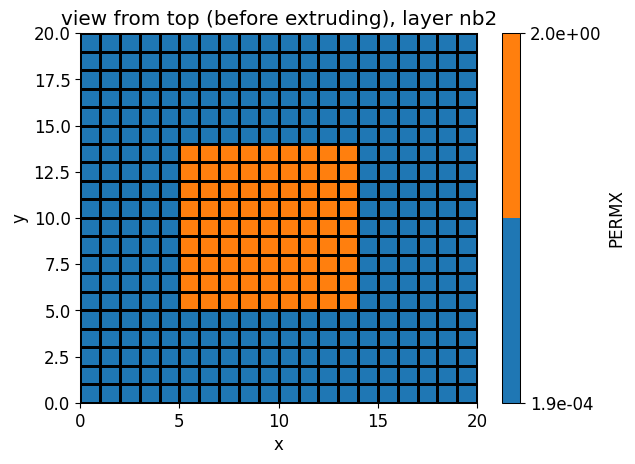

In [16]:
simu.show_input(prop="soil", yprop="PERMX", layer_nb=2)

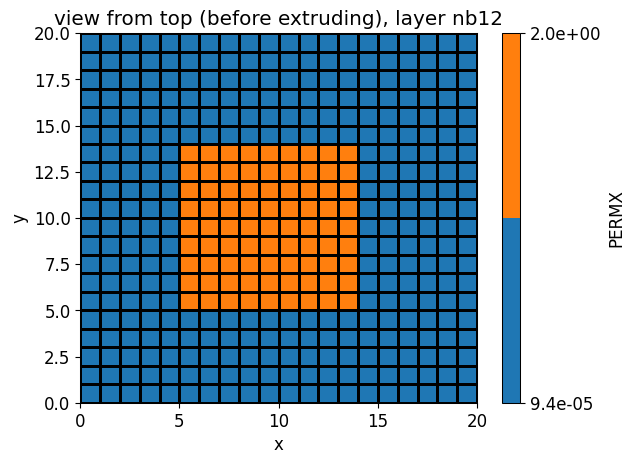

In [17]:
simu.show_input(prop="soil", yprop="PERMX", layer_nb=12)